In [8]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from mgclass import analysis, MusicGenreDataset, networks
from mgclass.utils import *
from mgclass.training import TrainingRun

In [9]:
dry_run = False

Using genre from playlist source
Clamping dataset to 160 songs per class. Removing 279 songs.
Preprocessing complete, found 90 duplicates


Creating dataset:   0%|          | 0/1280 [00:00<?, ?it/s]

Dataset creation finished in: 3.8105 seconds


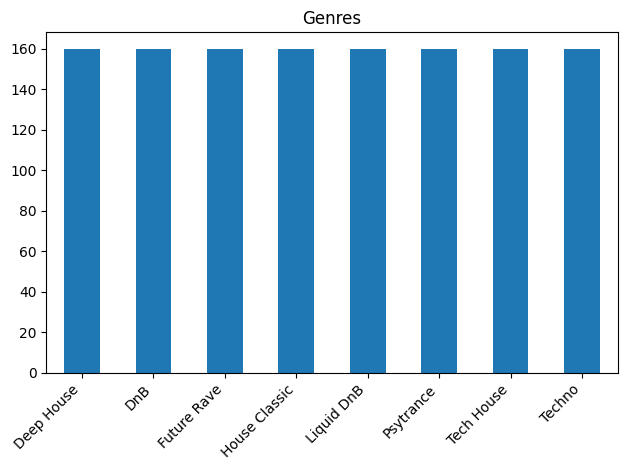

In [10]:
dataset = MusicGenreDataset(
        data_dir=Path("/home/georg/Music/ADL/"),
        preprocess=create_spectrogram(),
        file_transform=mp3_to_wav_location,
        playlist_to_genre=sample_playlist_to_genre,
        max_frames=1024,
        dry_run = dry_run
)

analysis.summarize_dataset(dataset)

In [13]:
model = networks.ResNet(dataset.num_classes)
run = TrainingRun(dataset, model, epochs=10, dry_run=dry_run, repeat_count=10)
run.start()
run.plot()

Starting training for 10 epoch


  0%|          | 0.00/10.0 [00:00<?, ?epochs/s]

Training finished in: 0.1701 seconds


AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/georg/git/music-genre-classification/venv/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/georg/git/music-genre-classification/venv/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 61, in fetch
    return self.collate_fn(data)
  File "/home/georg/git/music-genre-classification/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/home/georg/git/music-genre-classification/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 143, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/georg/git/music-genre-classification/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 143, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/georg/git/music-genre-classification/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 120, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "/home/georg/git/music-genre-classification/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 160, in collate_tensor_fn
    numel = sum(x.numel() for x in batch)
  File "/home/georg/git/music-genre-classification/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 160, in <genexpr>
    numel = sum(x.numel() for x in batch)
AttributeError: 'NoneType' object has no attribute 'numel'
